# LSI Information Retrieval System - A Simple Demo

## Latent Semantic Indexing for semantic search into documents

### Giovanni Oro, Riccardo Samaritan

Inside this notebook you will find a simple demo of our implementation of a Latent Semantic Indexing (LSI) system for semantic search into documents.

This little demo is based on synthetic dataset and synthetic queries, generated by us using ChatGPT. Anyway, as can be found in the `time_dataset.ipynb` file, it is possible to use a real dataset, such as the TIME dataset from Glasgow University, which contains a collection of news articles from Times Magazine.

---

First of all, we need to import the necessary libraries and modules, and then we can create a configuration for our LSI system. The configuration includes parameters such as the number of latent concepts and the metric used for the term-document matrix.

In [39]:
import matplotlib.pyplot as plt

from src.sys_config import SystemConfiguration
from src.lsi import LSI

We're going to use a set of synthetic documents named `DEMO.ALL`, which is a collection of documents that we generated for this demo. The documents are stored in the `data` directory.

Now we can create an instance of the `LSI` class, passing the path to the dataset and the configuration we just created. This will initialize our LSI system with the specified parameters.

In [2]:
config = SystemConfiguration(
    n_components=3,  
    metric="tf-idf"
)

In [3]:
data_path = "data/DEMO.ALL"

system = LSI(data_path, config)

Configuration: 3 components, tf-idf metric
   Using spaCy default stopwords


Now we can instance a list of sample free-form queries that we want to use for testing our LSI system. These queries are designed to cover various topics and will help us evaluate the semantic search capabilities of our system.

In [53]:
demo_queries = [
    "Medical jobs",
    "Solar energy ",
    "Artificial Intelligence for cybersecurity"
]

In [54]:
for i, query in enumerate(demo_queries, 1):
    print(f"\n[{i}] Query: '{query}'")
    print("-" * 40)

    doc_indices, similarities = system.retrieve(query, n_docs=3)

    for j, (doc_idx, sim) in enumerate(zip(doc_indices, similarities)):
        doc_id = int(system.parsed_df.iloc[doc_idx]['I'])
        title = system.document_indexes[doc_idx] if system.document_indexes[doc_idx] else f"Document {doc_id}"
        
        print(f"  {j+1}. [Doc {doc_id}] Similarity: {sim:.4f}")
        print(f"     Title: {title[:70]}...")
        
        if 'W' in system.parsed_df.columns:
            content = system.parsed_df.iloc[doc_idx]['W']
            if content and len(content.strip()) > 0:
                preview = content[:100] + "..." if len(content) > 100 else content
                print(f"     Preview: {preview}")
        print()


[1] Query: 'Medical jobs'
----------------------------------------
  1. [Doc 1] Similarity: 0.9992
     Title: AI-POWERED DIAGNOSTICS TRANSFORMING HEALTHCARE ECONOMICS...
     Preview: NEW AI SYSTEMS DEVELOPED BY LEADING RESEARCH INSTITUTIONS ARE NOT ONLY IMPROVING MEDICAL DIAGNOSES B...

  2. [Doc 6] Similarity: 0.9708
     Title: GENE EDITING, AI, AND THE FUTURE OF BIOTECH JOBS...
     Preview: AI-ENHANCED GENE EDITING IS TRANSFORMING BIOTECHNOLOGY, LEADING TO BOTH MEDICAL BREAKTHROUGHS AND EC...

  3. [Doc 3] Similarity: 0.9120
     Title: AUTOMATION AND AI DRIVE SPACE INDUSTRY JOBS...
     Preview: NASA AND SPACEX ARE USING AI-ENABLED ROBOTICS TO PREPARE FOR A FUTURE HUMAN SETTLEMENT ON MARS. THES...


[2] Query: 'Solar energy '
----------------------------------------
  1. [Doc 5] Similarity: 0.9979
     Title: AI OPTIMIZATION BOOSTS SOLAR ENERGY JOB MARKETS...
     Preview: AI IS REVOLUTIONIZING RENEWABLE ENERGY THROUGH SMART SOLAR SYSTEMS THAT PREDICT WEATHER, ADJUST PANE...

 

We can use the 'analyze_concepts' method to analyze the latent concepts in our LSI system. This method will provide us with insights into the most significant terms associated with each concept, allowing us to understand the semantic structure of our dataset.

Finally, we can visualize the results of our analysis by printing the top terms for each concept. This will give us a clear view of how the LSI system has grouped related terms together, highlighting the semantic relationships within our dataset.

Concepts analysis;
Available concepts: 0-2


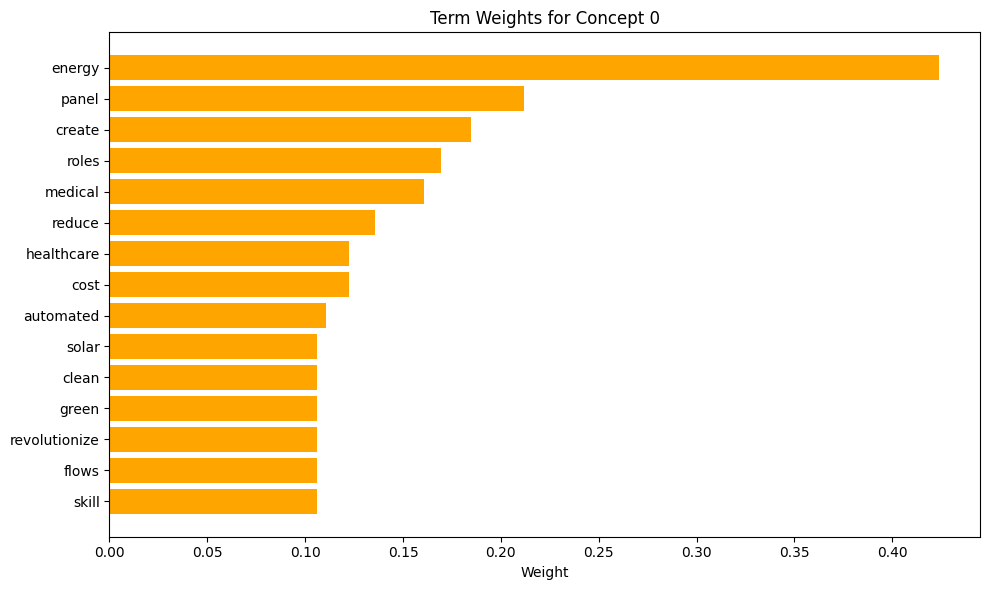

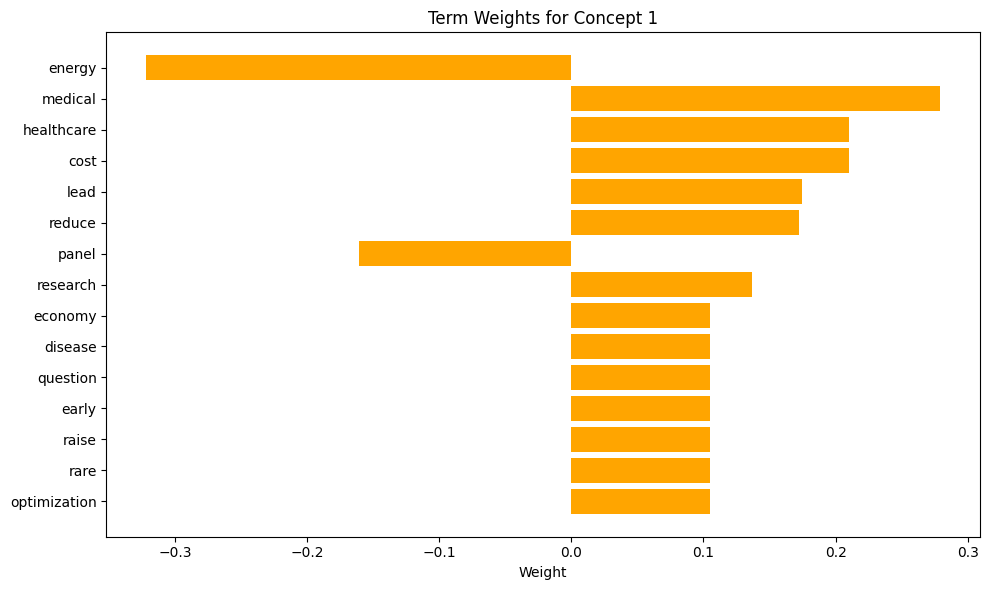

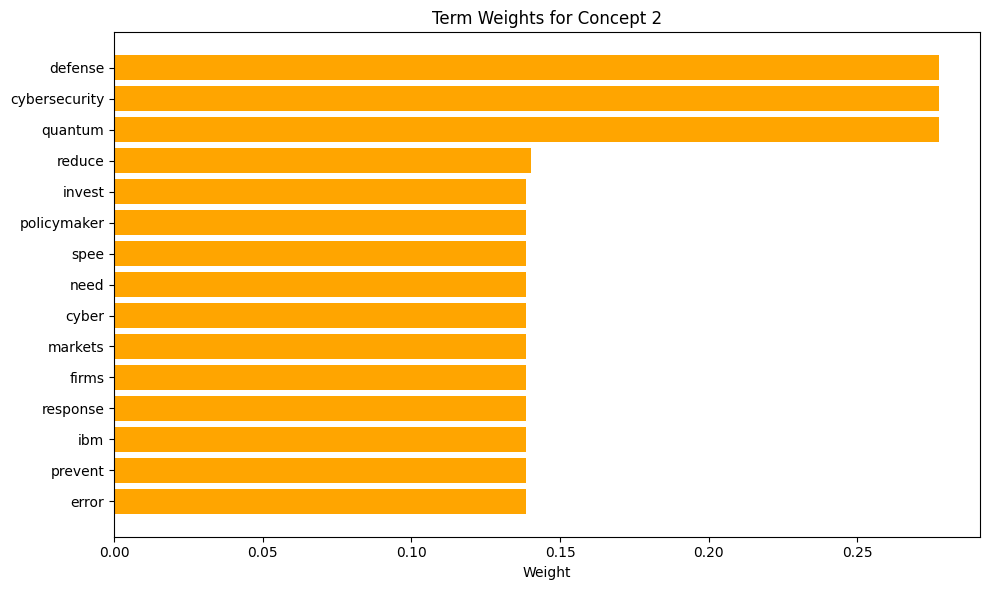

In [55]:
print("Concepts analysis;")
print(f"Available concepts: 0-{system.lsi.n_components-1}")

for concept_idx in range(system.lsi.n_components):
    system.lsi.analyze_concepts(concept_idx, n_terms=15)



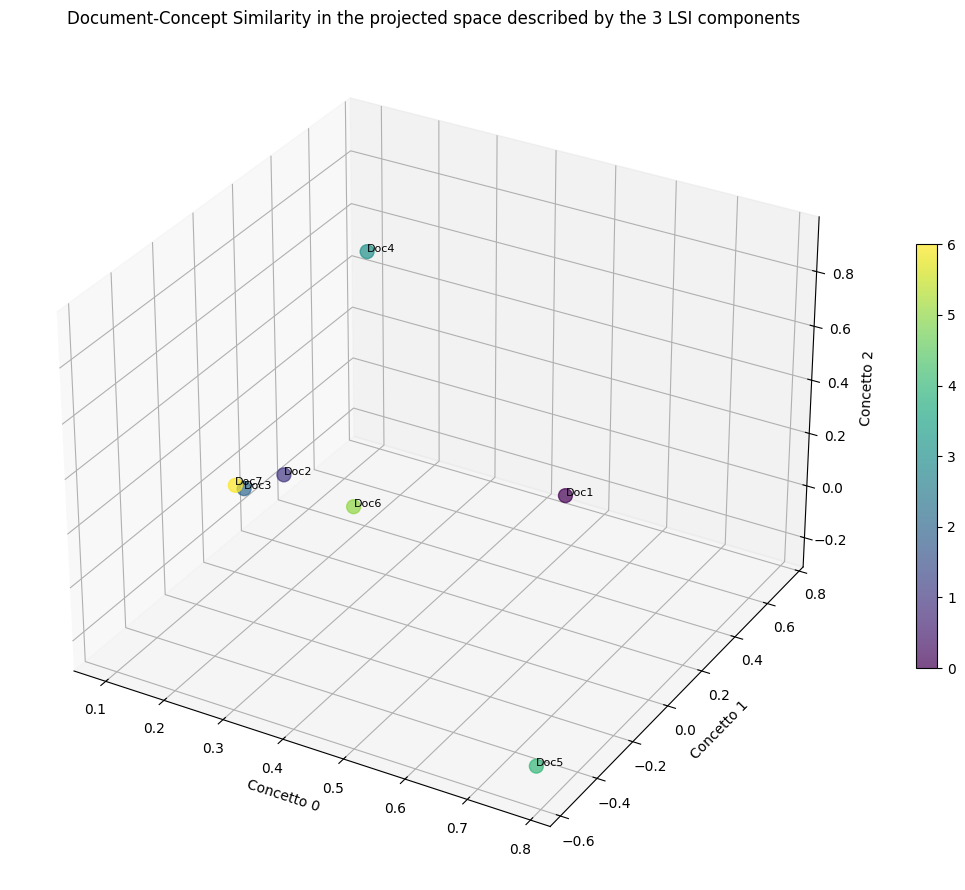

In [56]:
doc_coords = system.lsi.document_concept_similarity

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(doc_coords[:, 0], doc_coords[:, 1], doc_coords[:, 2], 
                    c=range(len(doc_coords)), cmap='viridis', s=100, alpha=0.7)

for i, (x, y, z) in enumerate(doc_coords):
    doc_id = int(system.parsed_df.iloc[i]['I'])
    ax.text(x, y, z, f'Doc{doc_id}', fontsize=8)

ax.set_xlabel('Concetto 0')
ax.set_ylabel('Concetto 1')
ax.set_zlabel('Concetto 2')
ax.set_title('Document-Concept Similarity in the projected space described by the 3 LSI components')

# Colorbar
plt.colorbar(scatter, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

## LSI Behaviour on a different number of components

As seen in the previous section, using 3 components has given us good results in retrieving information from the demo dataset. However, we can experiment with different dimensions to see how it affects the retrieval performance. Let's test the LSI system also with 4, 5, and 6 components to observe any changes in the results.

To perform this test, we are going to use the query "Solar energy".

In [61]:
test_query = demo_queries[1]
components_to_test = [3,4,5,6]

for n_comp in components_to_test:

    test_config = SystemConfiguration(
        n_components=n_comp,
        metric="tf-idf"
    )
   
    test_system = LSI(data_path, test_config)
    

    doc_indices, similarities = test_system.retrieve(test_query, n_docs=3)
    
    print(f"\nComponents: {n_comp}")
    print("-" * 30)
    
    for i, (doc_idx, sim) in enumerate(zip(doc_indices, similarities)):
        doc_id = int(test_system.parsed_df.iloc[doc_idx]['I'])
        title = test_system.document_indexes[doc_idx] if test_system.document_indexes[doc_idx] else f"Document {doc_id}"
        print(f"  {i+1}. [Doc {doc_id}] Similarity: {sim:.4f} - {title[:50]}...")


Configuration: 3 components, tf-idf metric
   Using spaCy default stopwords

Components: 3
------------------------------
  1. [Doc 5] Similarity: 0.9979 - AI OPTIMIZATION BOOSTS SOLAR ENERGY JOB MARKETS...
  2. [Doc 2] Similarity: 0.5678 - CLIMATE TECH AND AI: THE FUTURE OF AGRICULTURE JOB...
  3. [Doc 7] Similarity: 0.5442 - GLOBAL ECONOMY RESTRUCTURED BY AI AND AUTOMATION...
Configuration: 4 components, tf-idf metric
   Using spaCy default stopwords

Components: 4
------------------------------
  1. [Doc 5] Similarity: 0.9961 - AI OPTIMIZATION BOOSTS SOLAR ENERGY JOB MARKETS...
  2. [Doc 3] Similarity: 0.0714 - AUTOMATION AND AI DRIVE SPACE INDUSTRY JOBS...
  3. [Doc 1] Similarity: -0.0288 - AI-POWERED DIAGNOSTICS TRANSFORMING HEALTHCARE ECO...
Configuration: 5 components, tf-idf metric
   Using spaCy default stopwords

Components: 5
------------------------------
  1. [Doc 5] Similarity: 0.9961 - AI OPTIMIZATION BOOSTS SOLAR ENERGY JOB MARKETS...
  2. [Doc 3] Similarity: -0.0135 - 

The experimental results demonstrate that 3 components provides the optimal configuration for this LSI system. Document 5 (AI Optimization Boosts Solar Energy Job Markets) consistently ranks first across all configurations with similarity scores around 0.996-0.998, indicating robust semantic alignment with the query.

The key finding lies in how different component counts affect retrieval diversity. With 3 components, the system maintains a balanced similarity distribution (0.57 and 0.54 for second and third results), capturing a meaningful semantic progression from energy optimization to agricultural technology and global economic impacts—all unified by AI applications.

However, 4 or more components trigger dramatic performance degradation. Lower-ranked documents experience precipitous similarity drops, often falling below 0.1 or becoming negative, suggesting "semantic over-specialization." Higher dimensionality paradoxically reduces the system's ability to recognize broader thematic connections, creating isolated semantic clusters rather than coherent conceptual relationships.
This phenomenon challenges the assumption that more components yield better results. Instead, the 3-component configuration strikes an optimal balance between semantic precision and conceptual breadth, providing users with diverse, exploratory search results that reveal meaningful connections across different domains. 

Probably with another dataset, the results could be different, but for this demo dataset, we can conclude that 3 components is the best configuration.